this notebook is for secondary school results 2024 in Egypt

In [2]:
!pip install arabic-reshaper python-bidi

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#these 2 libraries are to deal with reversed arabic string as matplotlib reverse arabic language so these 2 libraries are the solution
import arabic_reshaper
from bidi.algorithm import get_display

In [4]:
df = pd.read_excel("D:/natega.xlsx")

In [5]:
df.shape

(734990, 6)

In [6]:
df.head()

,رقم الجلوس,الاسم,الدرجة,student_case,student_case_desc,c_flage
0,965187,ٍاسماء فرج حسن احمد,264.0,1,ناجح دور أول,1
1,469976,ءالاء احمد موسي علي,226.0,1,ناجح دور أول,1
2,962543,ءالاء محمود حلمي محمود,238.0,1,ناجح دور أول,1
3,864110,اًمال أحمد محمد سيد,234.0,1,ناجح دور أول,1
4,579828,اًيتن أشرف محمد عبدالجواد قرنى,277.0,1,ناجح دور أول,1


In [7]:
df.describe()

,رقم الجلوس,الدرجة,student_case,c_flage
count,734990.000000,734990.000000,734990.000000,734990.000000
mean,551266.457916,275.897541,1.285631,1.010279
std,259475.211783,65.776737,0.887737,0.121047
min,100000.000000,0.000000,1.000000,1.000000
25%,336381.250000,234.500000,1.000000,1.000000
50%,551476.500000,279.000000,1.000000,1.000000
75%,772111.750000,323.000000,1.000000,1.000000
max,990578.000000,671.909973,12.000000,3.000000


some notes:
-----------------
-----------
1. the max mark is 410 and there are records with marks above 410 so we need to clean it
2. we need percentage to visualize the data more clearly

In [8]:
df["percentage"] = df["الدرجة"] *100 / 410

In [9]:
df = df[(df["percentage"] < 100) & (df["percentage"] > 0 )]

In [10]:
df.shape

(727885, 7)

In [74]:
df[["percentage"]].describe()

,percentage
count,727885.000000
mean,67.631007
std,14.594159
min,0.121951
25%,57.439024
50%,68.170732
75%,78.780488
max,99.512195


now the mean and median of the marks are around 68% 

<Axes: xlabel='percentage', ylabel='Count'>

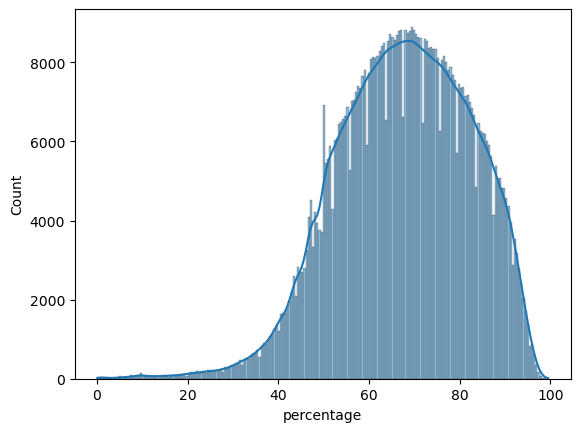

In [12]:
sns.histplot(data = df , x = "percentage" , kde = True)

In [13]:
df["student_case_desc"].unique()

array(['ناجح دور أول', 'راسب دور أول', 'دور ثان', 'غياب كلى دور أول'],
      dtype=object)

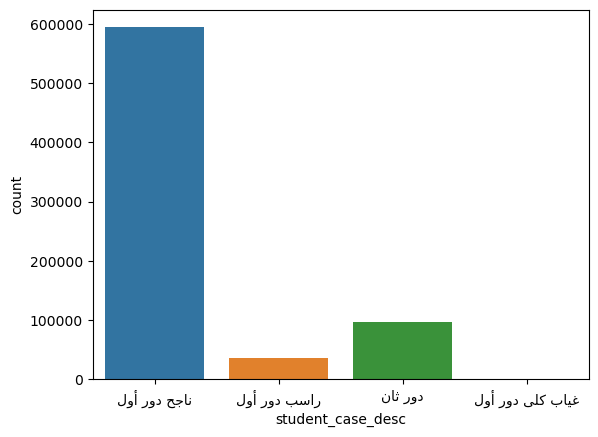

In [14]:
# Arabic labels
new_labels = ['ناجح دور أول', 'راسب دور أول', 'دور ثان', 'غياب كلى دور أول']

# Reshape and bidi-ize the Arabic text
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in new_labels]

# Creating the countplot
ax = sns.countplot(data=df, x="student_case_desc")

# Setting the correctly reshaped Arabic labels
ax.set_xticklabels(reshaped_labels)
plt.show();

------
the analysis ends here but i want to know the most frequent names in the table for fun

In [48]:
df_names = pd.DataFrame(df["الاسم"].str.split().str[0])

here's the problem of reversed arabic names

<Axes: ylabel='الاسم'>

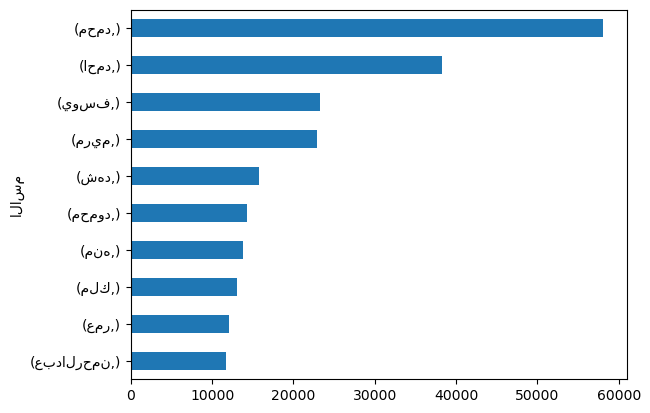

In [51]:
df_names.value_counts().sort_values().tail(10).plot(kind = "barh")

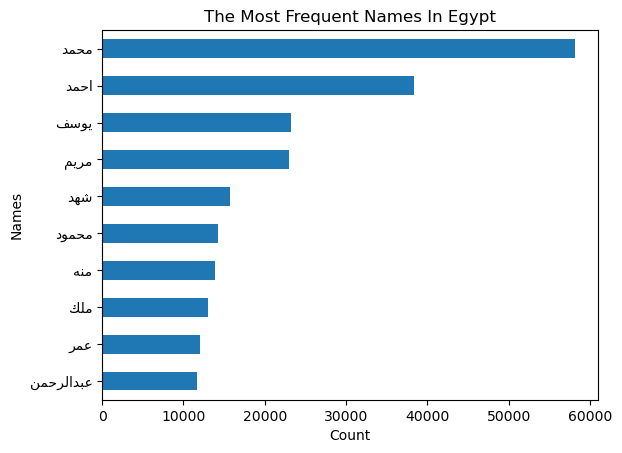

In [66]:
top_10 = df_names['الاسم'].value_counts().sort_values(ascending=True).tail(10)
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in top_10.index]
ax = top_10.plot(kind="barh")
ax.set_yticklabels(reshaped_labels)
plt.xlabel("Count")
plt.ylabel("Names")
plt.title("The Most Frequent Names In Egypt")

plt.show()